In [1]:
import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
import mlgrad.loss as loss
import mlgrad.models as models
import mlgrad.cls.cls_pca as cls_pca
import mlgrad.regr as regr

import sklearn.datasets as datasets
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, Y = datasets.load_digits(return_X_y=True)
Y = Y.astype("d")
d1 = 1; d2 = 7
X2 = X[(Y == d1) | (Y == d2)]
Y2 = Y[(Y == d1) | (Y == d2)]
Y2[Y2 == d1] = 1
Y2[Y2 == d2] = -1
N = len(Y2)
n = X2.shape[1]

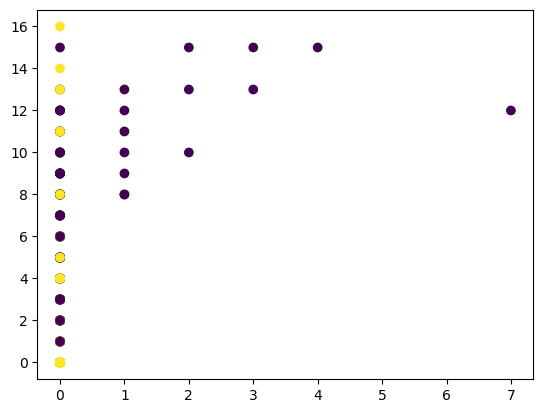

In [3]:
plt.scatter(X2[:,1], X2[:,2], c=Y2)
plt.show()

In [11]:
# def make_model(n):
#     mod = models.SigmaNeuronModel(funcs.Sigmoidal(1.0), n)
#     return mod

hinge_loss = loss.MarginLoss(funcs.Hinge(1.0))
l1_reg = funcs2.SquareNorm(offset=1)
tau = 0.0
cc, As, Us, mods = cls_pca.cls_pca(X2, Y2, hinge_loss, n, h=0.01, n_iter=5000, regnorm=l1_reg, tau=tau)
# Us = np.atan(1*Us)

0 : 23 1.0
1 : 78 1.0
2 : 82 1.0
3 : 132 1.0
4 : 257 1.0
5 : 428 1.0
6 : 562 1.0
7 : 947 1.0
8 : 4999 0.997229916897507
9 : 4999 0.9944598337950139
10 : 4999 0.9944598337950139
11 : 4999 0.9944598337950139
12 : 4999 0.9889196675900277
13 : 4999 0.9889196675900277
14 : 4999 0.9750692520775623
15 : 4999 0.9750692520775623
16 : 4999 0.9778393351800554
17 : 4999 0.96398891966759
18 : 4999 0.9418282548476454
19 : 4999 0.9058171745152355
20 : 4999 0.853185595567867
21 : 4999 0.8365650969529086
22 : 4999 0.8060941828254847
23 : 4999 0.7673130193905817
24 : 4999 0.7368421052631579
25 : 4999 0.7091412742382271
26 : 4999 0.6620498614958449
27 : 4999 0.6371191135734072
28 : 4999 0.6204986149584487
29 : 4999 0.590027700831025
30 : 4999 0.5706371191135734
31 : 4999 0.5678670360110804
32 : 4999 0.5844875346260388
33 : 4999 0.5235457063711911
34 : 4999 0.5429362880886427
35 : 4999 0.5207756232686981
36 : 4999 0.554016620498615
37 : 4999 0.5650969529085873
38 : 4999 0.5706371191135734
39 : 4999 0.5069

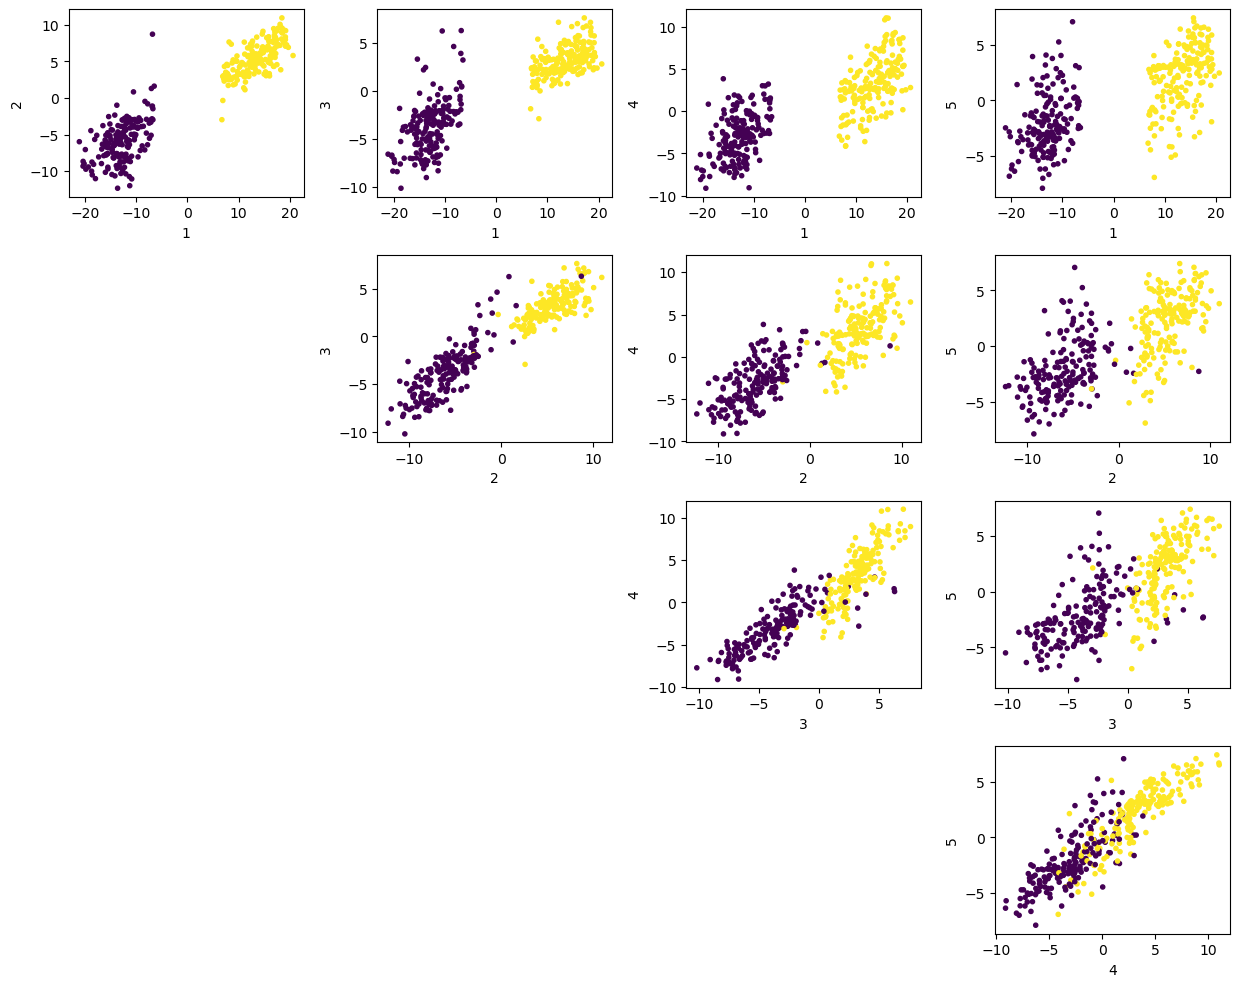

In [9]:
m = 5
plt.figure(figsize=(15,12))
for i in range(m-1):
    for j in range(i+1,m):
        plt.subplot(m,m,m*i+j+1)
        plt.scatter(Us[i], Us[j], c=Y2, s=9)
        plt.xlabel(i+1)
        plt.ylabel(j+1)
plt.tight_layout()
plt.show()

In [71]:
body = models.FFNetworkModel()
linear_layer = models.LinearLayer(n, n)
linear_layer.allocate()
for i in range(n):
    linear_layer.matrix[i,:] = mods[i].param
body += linear_layer
scale_layer = models.ScaleLayer(funcs.Sigmoidal(1), n)
body += scale_layer

In [72]:
U = body.evaluate(X2)
print(U.shape)

(130, 13)


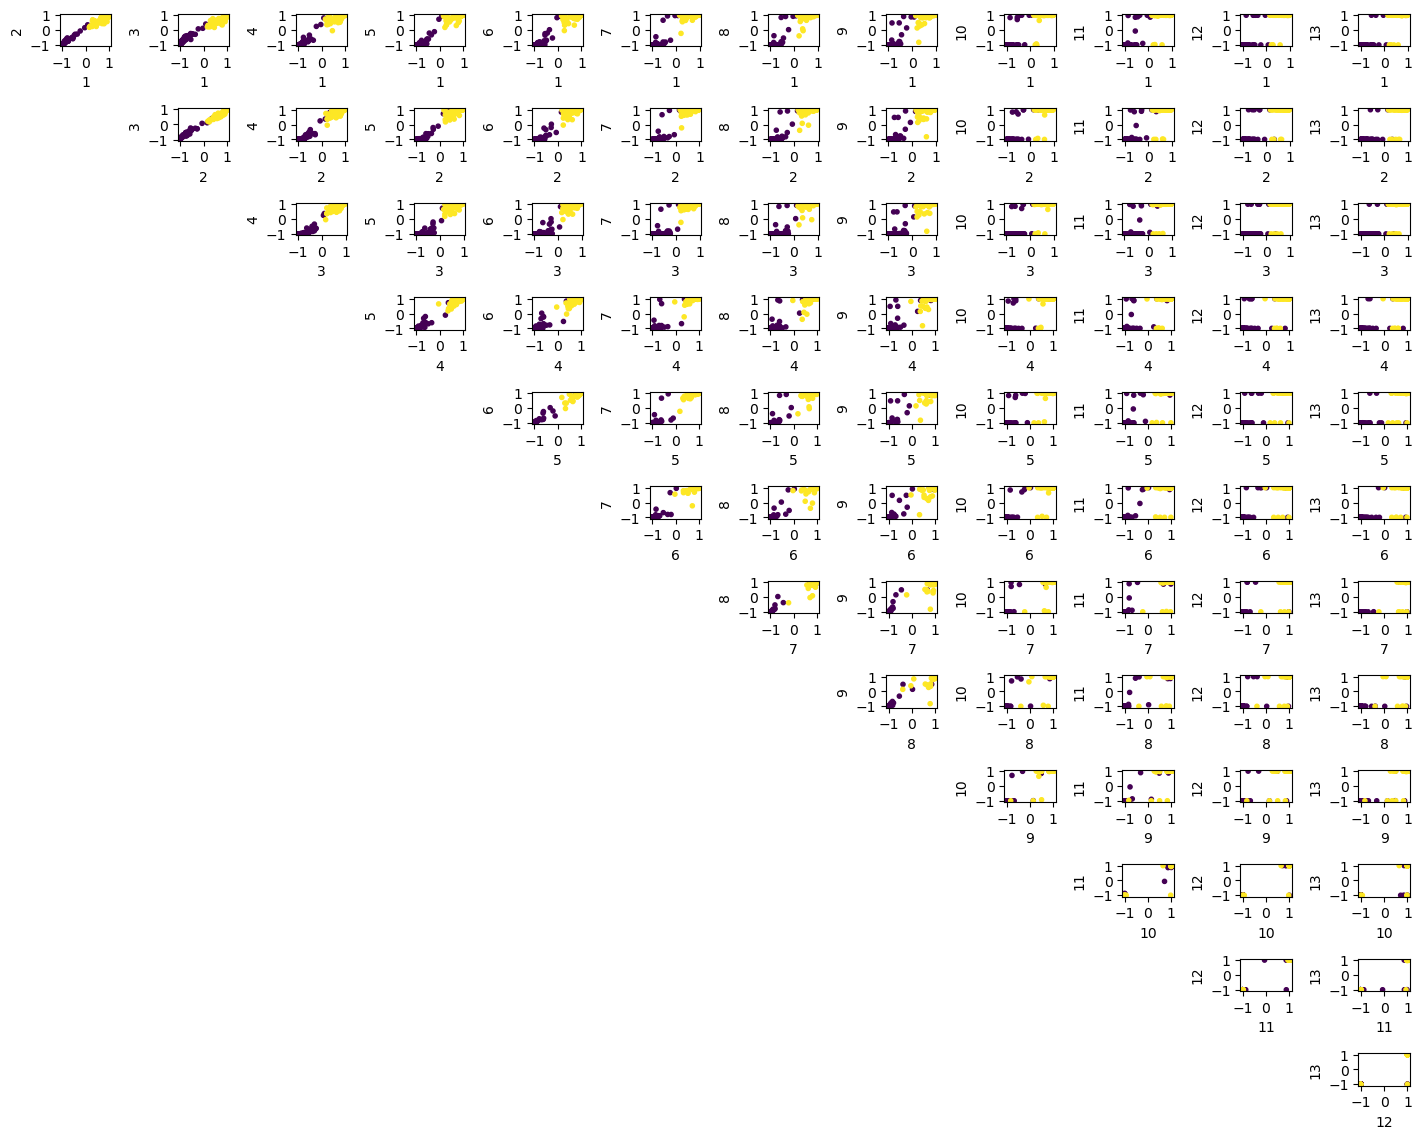

In [73]:
# plt.figure(figsize=(15,12))
# for i in range(n-1):
#     for j in range(i+1,n):
#         plt.subplot(n,n,n*i+j+1)
#         plt.scatter(U[:,i], U[:,j], c=Y2, s=9)
#         plt.xlabel(i+1)
#         plt.ylabel(j+1)
# plt.tight_layout()
# plt.show()

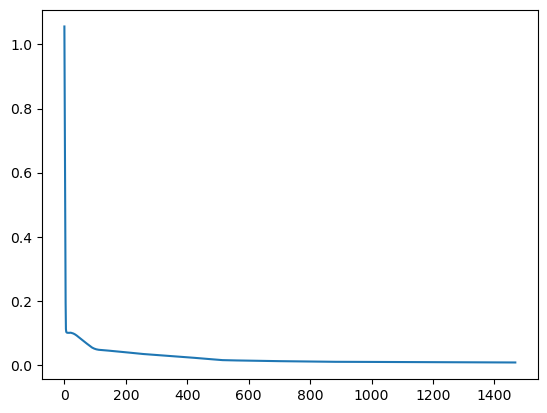

In [74]:
head = models.LinearModel(n, intercept=0)
alg2 = regr.regression(U, Y2, head, hinge_loss, h=0.02, tol=1.0e-8, n_iter=5000)

plt.plot(alg2.lvals)
plt.show()

In [75]:
accuracy_score(Y2, np.sign(head.evaluate(U)))

0.9923076923076923

In [76]:
print(np.asarray(head.param))

[ 2.476  1.121  1.079  0.846  0.370  0.259  0.056 -0.572 -0.789 -0.452
 -0.642  0.869  0.443]
